In [ ]:
빅데이터 방법론 - 폭포수 모형, 애자일 방법론, 


In [56]:
# 패키지/모듈 추가
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns

In [58]:
x_new = np.linspace(-1, 11, num=100)

In [60]:
x_new = x_new.reshape(-1, 1)
x_new.shape

(100, 1)

In [62]:
iris = sd.load_dataset('iris')

In [64]:
x = iris.drop('species', axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
y = iris['species']

In [68]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [70]:
rs = np.random.RandomState(100)
rs

RandomState(MT19937) at 0x1CF4377E240

In [72]:
x = 10 * rs.rand(100)

In [74]:
x

array([5.43404942, 2.78369385, 4.24517591, 8.44776132, 0.04718856,
       1.21569121, 6.70749085, 8.25852755, 1.3670659 , 5.75093329,
       8.91321954, 2.09202122, 1.8532822 , 1.0837689 , 2.19697493,
       9.78623785, 8.11683149, 1.71941013, 8.16224749, 2.74073747,
       4.31704184, 9.4002982 , 8.17649379, 3.3611195 , 1.75410454,
       3.72832046, 0.05688507, 2.52426353, 7.95662508, 0.15254971,
       5.98843377, 6.03804539, 1.05147685, 3.81943445, 0.36476057,
       8.90411563, 9.80920857, 0.59941989, 8.90545945, 5.76901499,
       7.42479689, 6.30183936, 5.81842192, 0.20439132, 2.10026578,
       5.44684878, 7.69115171, 2.50695229, 2.8589569 , 8.52395088,
       9.75006494, 8.84853293, 3.59507844, 5.98858946, 3.54795612,
       3.40190215, 1.7808099 , 2.37694209, 0.44862282, 5.0543143 ,
       3.76252454, 5.92805401, 6.29941876, 1.42600314, 9.33841299,
       9.46379881, 6.02296658, 3.8776628 , 3.63188004, 2.04345277,
       2.76765061, 2.46535881, 1.73608002, 9.66609694, 9.57012

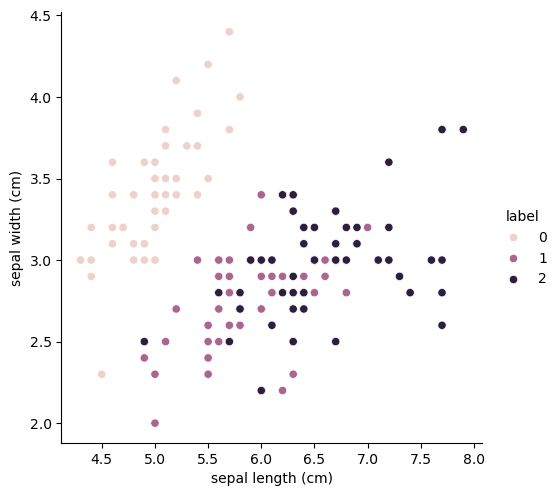

In [80]:
#데이터셋 준비 및 탐색/특징 선택
iris = load_iris()
iris_data = iris.data
iris_label = iris.target
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df ['label'] = iris.target
sns.pairplot(iris_df, x_vars=["sepal length (cm)"], 
y_vars=["sepal width (cm)"], hue="label", height=5)

In [82]:
# 머신러닝 수행
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2) 

dt_clf = DecisionTreeClassifier() 
knn_clf = KNeighborsClassifier() 

dt_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

y1_pred = dt_clf.predict(X_test) 
y2_pred = knn_clf.predict(X_test) 

print('DecisionTree 예측정확도 : {0:.4f}'.format(accuracy_score(y_test, y1_pred))) 
print('k-NN 예측정확도 : {0: .4f}'.format(accuracy_score(y_test, y2_pred))) 

DecisionTree 예측정확도 : 0.9000
k-NN 예측정확도 :  0.9000


In [84]:
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv") 
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [86]:
df.Pos.value_counts() 

Pos
SG    50
C     50
Name: count, dtype: int64

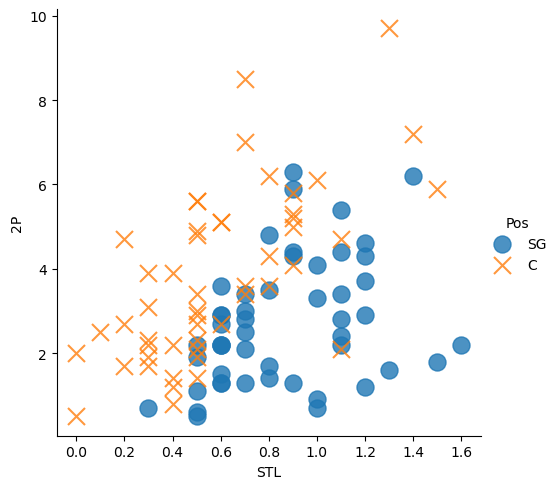

In [92]:
# 스틸, 2점슛 데이터 시각화
sns.lmplot(x='STL', y='2P', data=df, fit_reg=False,  
           scatter_kws={"s": 150}, 
           markers=["o", "x"], 
           hue="Pos") 

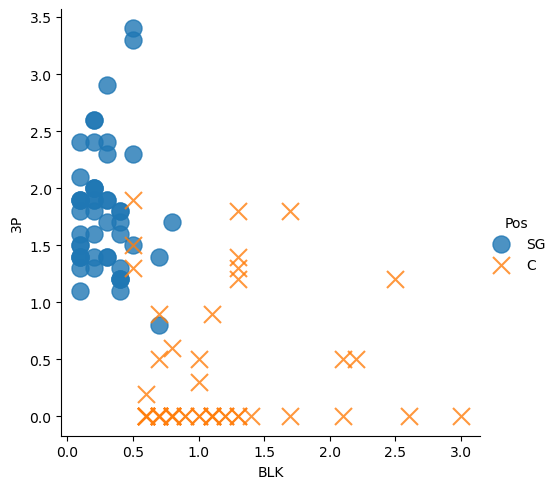

In [94]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot(x='BLK', y='3P', data=df, fit_reg=False,  
           scatter_kws={"s": 150}, 
           markers=["o", "x"], 
           hue="Pos") 

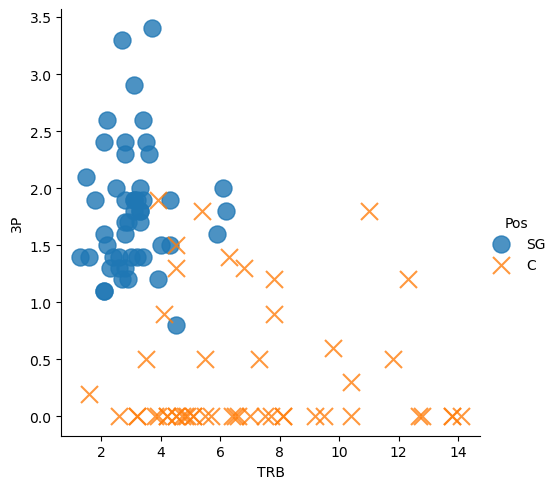

In [96]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot(x='TRB', y='3P', data=df, fit_reg=False,  
           scatter_kws={"s": 150}, 
           markers=["o", "x"], 
           hue="Pos")

In [98]:
# 데이터 다듬기
df.drop(['2P', 'AST', 'STL'], axis=1, inplace = True) 
df.head() 

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [100]:
# 데이터 나누기(train,test용)
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df, test_size=0.2) 

print(train.shape[0])
print(test.shape[0])

80
20


In [102]:
# 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [104]:
np.random.seed(5)

In [106]:
# 최적의 kNN파라미터 찾기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [108]:
max_k_range = train.shape[0] // 2 
k_list = [] 
for i in range(3, max_k_range, 2): 
    k_list.append(i) 

cross_validation_scores = [] 
x_train = train[['3P', 'BLK' , 'TRB']] 
y_train = train[['Pos']] 

for k in k_list:  
    knn = KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), 
                             cv=10, scoring='accuracy') 
    cross_validation_scores.append(scores.mean()) 

cross_validation_scores

[0.925,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.9,
 0.875,
 0.8625,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.85,
 0.8375,
 0.8375,
 0.8125,
 0.8125]

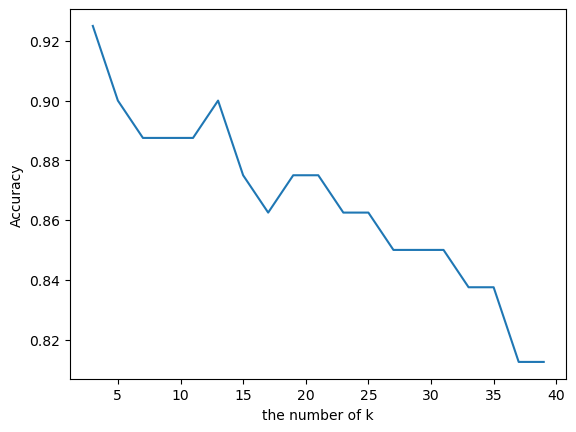

The best number of k : 3


In [110]:
# k의 변화에 따른 정확도 시각화
plt.plot(k_list, cross_validation_scores) 
plt.xlabel('the number of k') 
plt.ylabel('Accuracy') 
plt.show() 
cvs = cross_validation_scores 
k = k_list[cvs.index(max(cross_validation_scores))] 
print("The best number of k : " + str(k) )

In [112]:
# k-NN 모델 테스트
from sklearn.metrics import accuracy_score 

knn = KNeighborsClassifier(n_neighbors=k) 

x_train = train[['3P', 'BLK', 'TRB']] 
y_train = train[['Pos']] 

knn.fit(x_train, y_train.values.ravel()) 

x_test = test[['3P', 'BLK', 'TRB']] 
y_test = test[['Pos']] 
pred = knn.predict(x_test) 
print("accuracy : "+  
          str(accuracy_score(y_test.values.ravel(), pred)) ) 

accuracy : 0.9


In [114]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison.head(10) 

,prediction,ground_truth
0,C,C
1,C,C
2,C,C
3,SG,SG
4,SG,SG
5,C,C
6,C,C
7,C,C
8,C,C
9,SG,C
